<a href="https://colab.research.google.com/github/hhnnhh/berlin_datascience_lab/blob/master/exploration/02_baseline_model/EDA_data_cleaning_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis:

by Isabelle Nguyen and Hannah Bohle

## Data Exploration and Cleaning:

* Fuel_Type
* GVW-Type
* car_age
* odometer 

Extensive exploration of ODOMETER! 

Feature Engineering (FUEL_TYPE)

## Modeling Logistic Regression and SVM

* Downsampling data (equal frequency of PASS and FAIL).
* Grid Search. 
* No feature scaling. 
* Final ROC Score with LogReg ~.65, SVC ~.66



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data_path = "/content/drive/My Drive/WIMLDS/sample.csv"
#data_path = "/content/WIMLDS/sample.csv"

In [4]:
df = pd.read_csv(data_path, lineterminator='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,18,26,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,1FTCR10A8RUE42421,S,NPE42421,1.0,4222,1994,FORD,RANGER REG. CAB - SHO,4,2300,M,N,53274,G,3,16.97,87107,F,11.0,948055,1,1,1.21,2676,12.7,3.57,18,22,180,0.0,0.0,1.2,1.23,809.0,12.4,3.8,26.0,32.0,180.0,0.03,0.04,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,141.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,1G1JC5249Y7453635,S,CKK700,1.0,2875,2000,CHEVROLET,CAVALIER,4,2200,A,N,109225,G,1,19.95,87114,F,6.0,0,1,1,0.00,0,0.0,0.00,0,0,100,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,P,N,N,N,N,P,P,1.0,1.0,4.0,1.0,0.0,5.0,0.0,3.0,4.0,1.0,0.0,P,6.0,NaN,NaN,NaN,P,1.0,P,1.0,0.0,NaN,140.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,N,N,N,N,N,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r
2,298121,185,NaN,IR354,W109,32641547,I,NaN,2004-08-31 13:03:00,2004-08-31 13:03:00,KNJBT06K2K6116760,M,NP116760,1.0,2000,1989,FORD,FESTIVA,4,1300,M,N,110347,G,1,NaN,87108,F,4.0,890199,1,1,1.47,2480,10.4,6.73,20,29,200,0.0,0.0,1.2,0.00,690.0,0.0,0.0,0.0,0.0,200.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,P,P,N,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,99.0,140.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,Anderson,Phillip,L,NaN,T,0.0,IR354,W109,2006-01-24 09:07:03\r
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,1JCNJ15U6FT075960,M,469FNH,2.0,6200,1985,JEEP,GRAND WAGONEER,8,5900,A,N,152121,G,4,18.81,87103,F,15.0,850119,1,1,1.13,2495,13.6,2.32,12,14,300,0.0,0.0,3.0,1.24,911.0,12.4,4.1,12.0,15.0,300.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,141.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,2006-01-26 17:03:05\r
4,384955,1326,4492

In [6]:
# get columns for data exploration
df_subset = df[["RecordID", "TEST_SDATE", "TEST_EDATE", "ODOMETER", "VEHICLE_TYPE", "MODEL_YEAR", "FUEL_TYPE", "GVW_TYPE", "OVERALL_RESULT"]]

In [7]:
df_subset.head()

,RecordID,TEST_SDATE,TEST_EDATE,ODOMETER,VEHICLE_TYPE,MODEL_YEAR,FUEL_TYPE,GVW_TYPE,OVERALL_RESULT
0,111260,2004-12-16 10:57:00,2004-12-16 11:03:00,53274,3,1994,G,1.0,P
1,138031,2004-08-13 14:10:00,2004-08-13 14:12:00,109225,1,2000,G,1.0,P
2,298121,2004-08-31 13:03:00,2004-08-31 13:03:00,110347,1,1989,G,1.0,A
3,369185,2004-12-02 11:33:00,2004-12-02 11:39:00,152121,4,1985,G,2.0,P
4,384955,2004-12-29 17:00:00,2004-12-29 17:03:00,135640,1,1997,G,1.0,P


# Data Exploration

In [8]:
# check dtypes
df_subset.dtypes

RecordID            int64
TEST_SDATE         object
TEST_EDATE         object
ODOMETER            int64
VEHICLE_TYPE        int64
MODEL_YEAR          int64
FUEL_TYPE          object
GVW_TYPE          float64
OVERALL_RESULT     object
dtype: object

In [9]:
# only keep rows with "pass" or "fail" overall result
overall_result_mask = (df_subset["OVERALL_RESULT"] == "P") | (df_subset["OVERALL_RESULT"] == "F")
df_subset = df_subset[overall_result_mask]

In [10]:
# get age of car - CAR_AGE
df_subset["CAR_AGE"] = pd.to_datetime(df_subset["TEST_EDATE"]).dt.year - df_subset["MODEL_YEAR"]

In [11]:
# how many missing values?
df_subset.isnull().sum()

RecordID          0
TEST_SDATE        0
TEST_EDATE        0
ODOMETER          0
VEHICLE_TYPE      0
MODEL_YEAR        0
FUEL_TYPE         0
GVW_TYPE          0
OVERALL_RESULT    0
CAR_AGE           0
dtype: int64

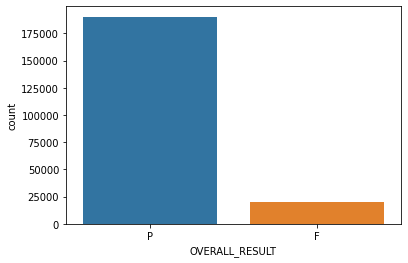

In [12]:
# remove aborted rows?
sns.countplot(df_subset["OVERALL_RESULT"])

In [13]:
# change categorical variables to categorical type
df_subset["VEHICLE_TYPE"]= df_subset["VEHICLE_TYPE"].astype("category")
df_subset["FUEL_TYPE"]= df_subset["FUEL_TYPE"].astype("category")
df_subset["GVW_TYPE"]= df_subset["GVW_TYPE"].astype("category")
df_subset["OVERALL_RESULT"]= df_subset["OVERALL_RESULT"].astype("category")

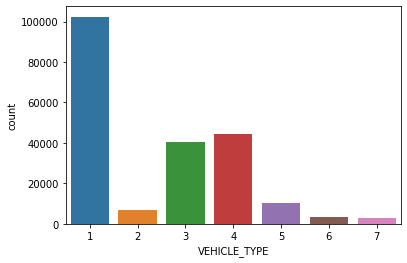

In [14]:
sns.countplot(df_subset["VEHICLE_TYPE"])

##Fuel Type


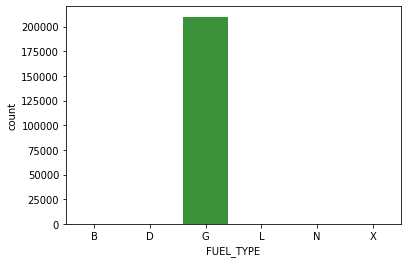

In [15]:
sns.countplot(df_subset["FUEL_TYPE"])

In [16]:
df_subset["FUEL_TYPE"].value_counts()

G    210047
D       333
X       255
N        16
B        14
L        10
Name: FUEL_TYPE, dtype: int64

##GVW Type
The variable represents the three "Gross Vehicle Weight Classes" 1, 2 and 3. (1 < 6000 lbs, 2 = 6000 - 8500 lbs, 3 = 8500-10000 lbs)

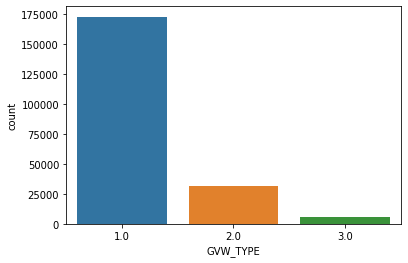

In [17]:
sns.countplot(df_subset["GVW_TYPE"])

## CAR AGE
calculated with "MODEL_YEAR" - "TEST_YEAR". Due to a resulting negative value of -1, the complete age variable was encreased by 1 year

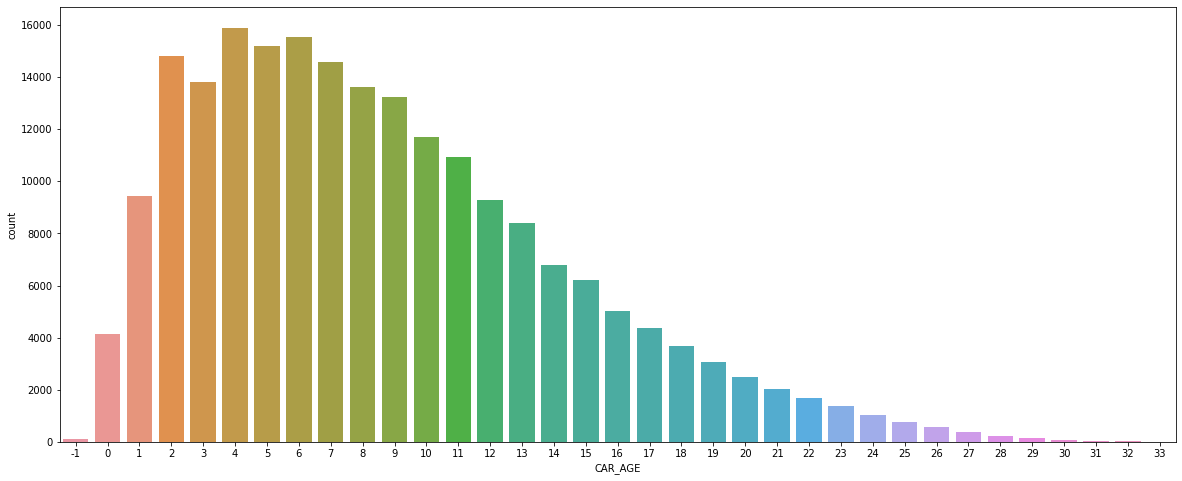

In [18]:
fig, ax = plt.subplots(figsize=[20,8])
sns.countplot(df_subset["CAR_AGE"])

In [19]:
# rows with negative CAR_AGE
car_age_mask = df_subset["CAR_AGE"] == -1
df_subset[car_age_mask]

,RecordID,TEST_SDATE,TEST_EDATE,ODOMETER,VEHICLE_TYPE,MODEL_YEAR,FUEL_TYPE,GVW_TYPE,OVERALL_RESULT,CAR_AGE
270,409312,2004-11-15 16:52:00,2004-11-15 16:55:00,11918,4,2005,G,1.0,P,-1
1609,130521,2004-09-27 18:37:00,2004-09-27 18:40:00,511940,4,2005,G,1.0,P,-1
1625,341726,2004-12-13 13:06:00,2004-12-13 13:09:00,11465,1,2005,G,1.0,P,-1
2023,171325,2004-12-16 09:30:00,2004-12-16 09:32:00,29480,5,2005,G,1.0,P,-1
4156,341745,2004-12-15 13:24:00,2004-12-15 13:27:00,5232,1,2005,G,1.0,P,-1
4417,409082,2004-10-14 15:46:00,2004-10-14 15:49:00,9645,5,2005,G,1.0,P,-1
5267,256561,2004-11-10 10:18:00,2004-11-10 10:20:00,1503,1,2005,G,1.0,P,-1
5479,341683,2004-12-06 16:05:00,2004-12-06 16:07:00,22903,4,2005,G,1.0,P,-1
6381,256813,2004-09-29 12:16:00,2004-09-29 12:20:00,834,1,2005,G,1.0,P,-1
7139,468742,2004-12-29 09:54:00,2004-12-29 09:57:00,92,4,2005,G,1.0,P,-1


In [20]:
# add 1 to CAR_AGE 
df_subset["CAR_AGE"] += 1

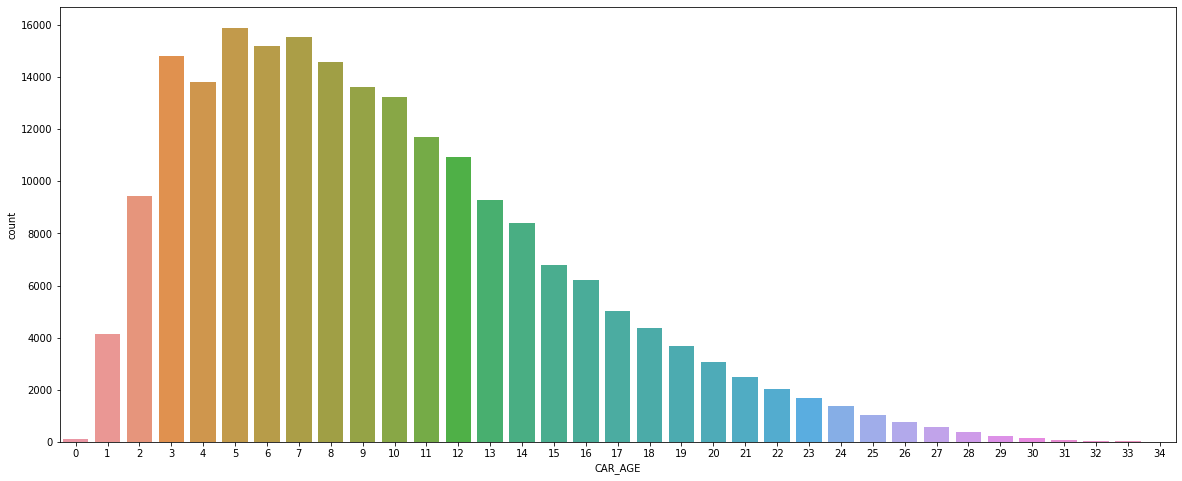

In [21]:
fig, ax = plt.subplots(figsize=[20,8])
sns.countplot(df_subset["CAR_AGE"])

##ODOMETER

In [22]:
#fig, ax = plt.subplots(figsize=[16,8])
#sns.distplot(df_subset["ODOMETER"])

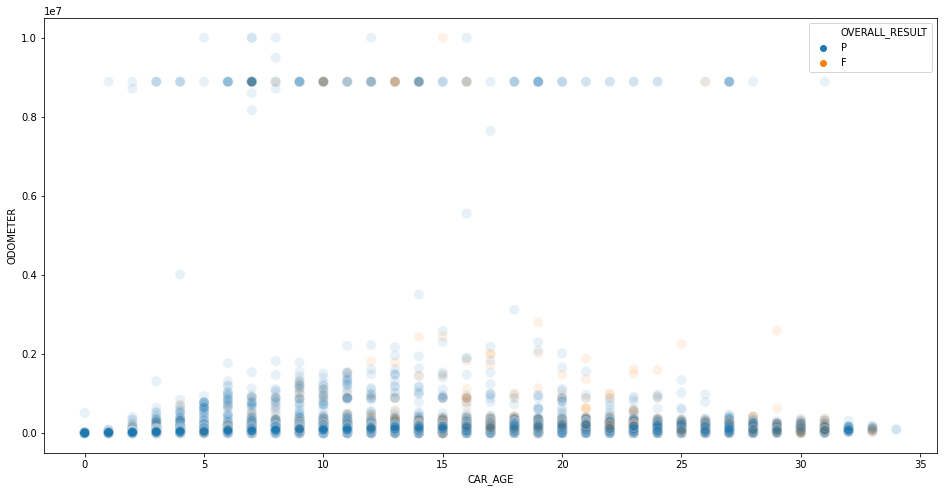

In [23]:
fig, ax = plt.subplots(figsize=[16,8])
sns.scatterplot(data=df_subset, x='CAR_AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

#### Odometer Investigation

There seem to be some values for odometer that are used frequently, let's investigate

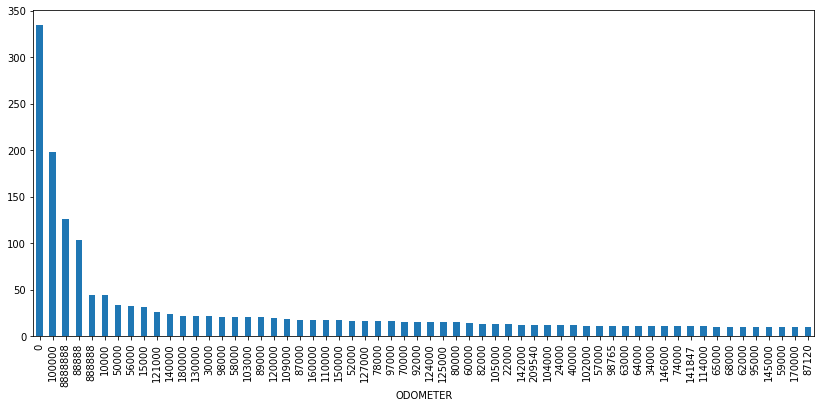

In [24]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('ODOMETER').size().sort_values(ascending=False).head(60).plot.bar()

Are the frequently used odometer values generated by the same station/ the same mechanic?

In [25]:
df['MECHANIC_LAST_NAME'] = df.MECHANIC_LAST_NAME.str.title()
df['MECHANIC_FIRST_NAME'] = df.MECHANIC_FIRST_NAME.str.title()

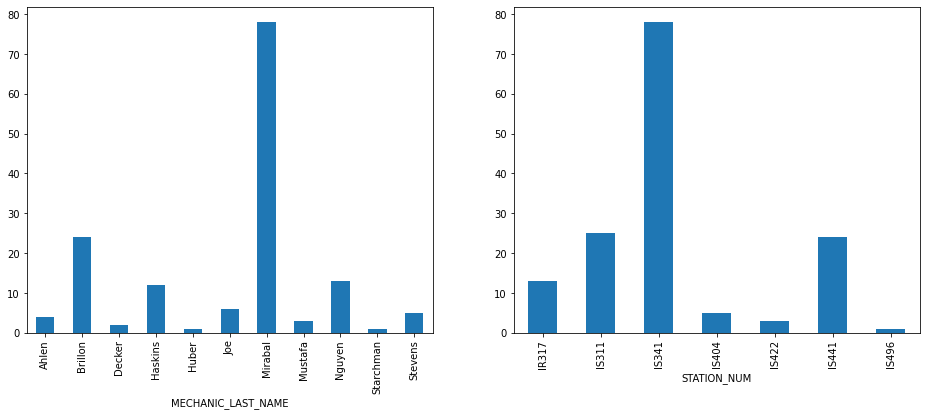

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 8888888].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 8888888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

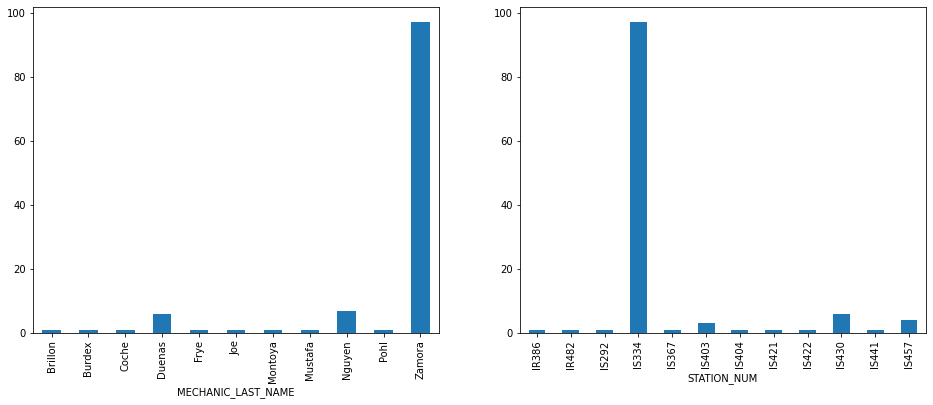

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 88888].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 88888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

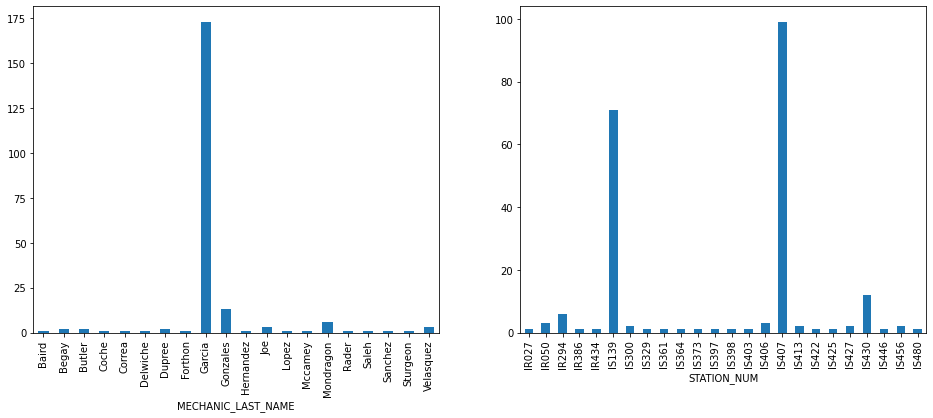

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 100000].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 100000].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

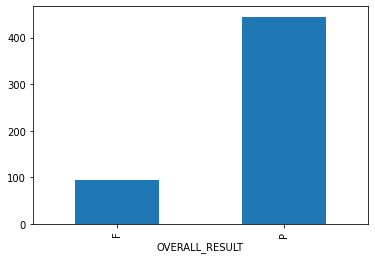

In [29]:
df_subset[df_subset.ODOMETER >= 400000].groupby('OVERALL_RESULT').size().plot.bar()

#### Odometer values by vehicle type and vehicle weight type

Please note: I do not know why when I limit the range of the dataset, for example for odometer values of only 400,000 and above, that the seaborn distplots still include the full odometer range. As you can see, the plots are indeed different when limiting the odometer values, but the values on the x-axis don't make sense. 

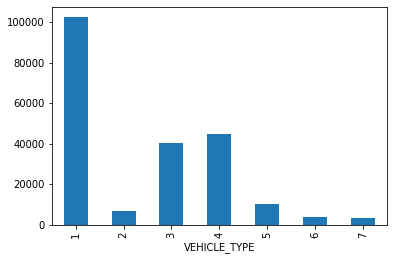

In [30]:
# freq. of vehicle types
df_subset.groupby('VEHICLE_TYPE').size().plot.bar()

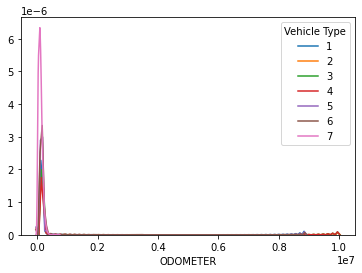

In [31]:
for x in sorted(df_subset['VEHICLE_TYPE'].unique()):
  cat=df_subset[df_subset['VEHICLE_TYPE']==x]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Type')
plt.show()

Check out distributions for "reasonable" vs "unreasonable" odometer values./


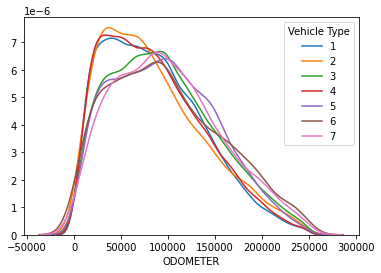

In [32]:
for x in sorted(df_subset['VEHICLE_TYPE'].unique()):
  cat_mask=(df_subset['VEHICLE_TYPE']==x) & (df_subset['ODOMETER']<250000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Type')
plt.show()

Vehicle types with 250,000 miles or fewer (reasonable) have simliar distributions.

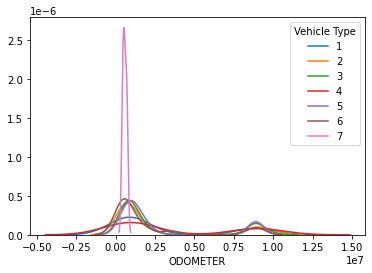

In [33]:
fig, ax = plt.subplots()
for x in sorted(df_subset['VEHICLE_TYPE'].unique()):
  cat_mask=(df_subset['VEHICLE_TYPE']==x) & (df_subset['ODOMETER']>400000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x, ax=ax)
#ax.set(xlim=(400000,1200000))
plt.legend(title='Vehicle Type')
plt.show()

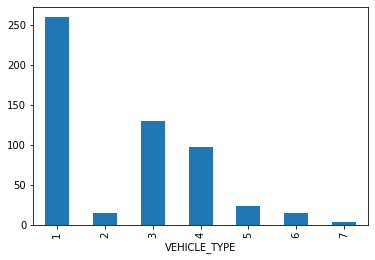

In [34]:
df_subset[df_subset["ODOMETER"]>400000].groupby("VEHICLE_TYPE").size().plot.bar()

Look at very extreme values > 800000

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


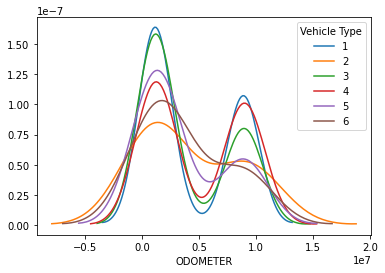

In [35]:
for x in sorted(df_subset['VEHICLE_TYPE'].unique()):
  cat_mask=(df_subset['VEHICLE_TYPE']==x) & (df_subset['ODOMETER']>800000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Type')
plt.show()

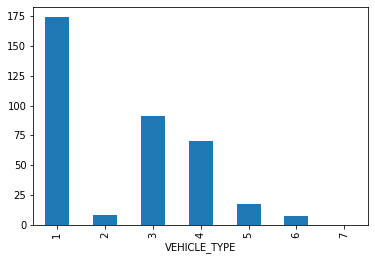

In [36]:
df_subset[df_subset["ODOMETER"]>800000].groupby("VEHICLE_TYPE").size().plot.bar()

Vehicles with unlikely odometer vales: these are most frequently occuring with vehicle type 1. It could be that this vehicle type simply gets more mileage than others. OR that imputing odometer values can be done with a combination of car age and vehicle type. 

Vehicle Weight Type

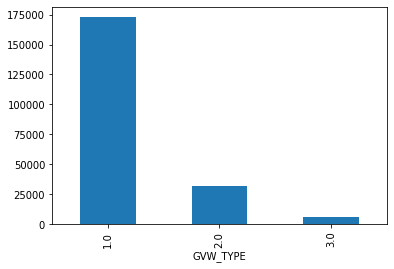

In [37]:
df_subset.groupby("GVW_TYPE").size().plot.bar()

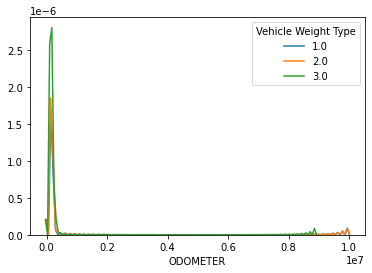

In [38]:
for x in sorted(df_subset['GVW_TYPE'].unique()):
  cat_mask=(df_subset['GVW_TYPE']==x)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Weight Type')
plt.show()

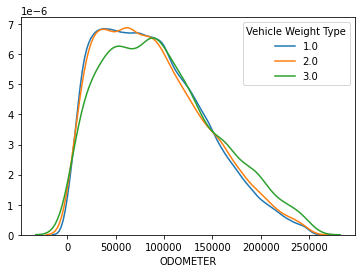

In [39]:
# up to 250,000
for x in sorted(df_subset['GVW_TYPE'].unique()):
  cat_mask=(df_subset['GVW_TYPE']==x) & (df_subset['ODOMETER']<250000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Weight Type')
plt.show()

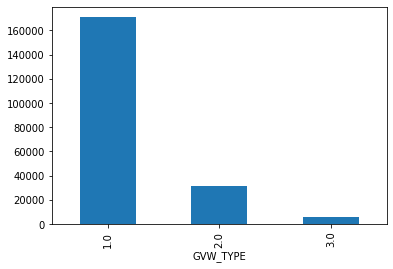

In [40]:
df_subset[df_subset["ODOMETER"]<250000].groupby("GVW_TYPE").size().plot.bar()

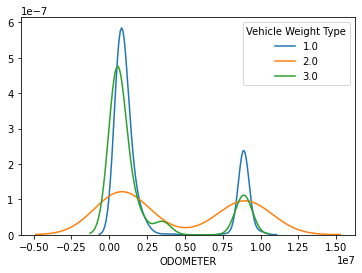

In [41]:
# more than 400000
for x in sorted(df_subset['GVW_TYPE'].unique()):
  cat_mask=(df_subset['GVW_TYPE']==x) & (df_subset['ODOMETER']>400000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Weight Type')
plt.show()

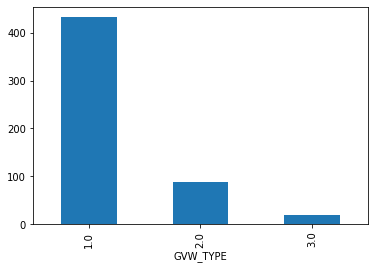

In [42]:
df_subset[df_subset["ODOMETER"]>400000].groupby("GVW_TYPE").size().plot.bar()

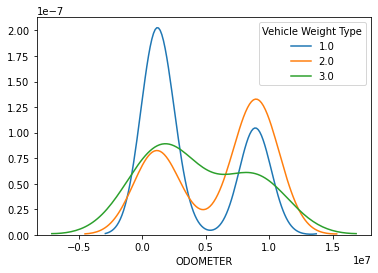

In [43]:
# more than 800000, e.g. impossible
for x in sorted(df_subset['GVW_TYPE'].unique()):
  cat_mask=(df_subset['GVW_TYPE']==x) & (df_subset['ODOMETER']>800000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], hist=False, kde=True, label=x)
plt.legend(title='Vehicle Weight Type')
plt.show()

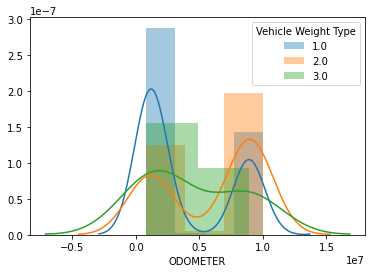

In [44]:
#just for fun do the histogram & kde
for x in sorted(df_subset['GVW_TYPE'].unique()):
  cat_mask=(df_subset['GVW_TYPE']==x) & (df_subset['ODOMETER']>800000)
  cat=df_subset[cat_mask]
  sns.distplot(cat['ODOMETER'], label=x)
plt.legend(title='Vehicle Weight Type')
plt.show()

In [45]:
print(f'Percentage of vehicles with extreme odometer values (more than 400,000): {(len(df_subset[df_subset["ODOMETER"]>400000])/len(df_subset))*100}')

Percentage of vehicles with extreme odometer values (more than 400,000): 0.2563189747241011


In [46]:
df_subset['OVERALL_RESULT'].value_counts()

P    190323
F     20352
Name: OVERALL_RESULT, dtype: int64

In [47]:
df_subset.loc[df_subset['ODOMETER']>400000, 'OVERALL_RESULT'].value_counts()

P    445
F     95
Name: OVERALL_RESULT, dtype: int64

Percentage of cars with 400,000 miles by pass and fail.

In [48]:
100* df_subset[df_subset['ODOMETER']>400000].groupby('OVERALL_RESULT')['ODOMETER'].count() / df_subset.groupby('OVERALL_RESULT')['ODOMETER'].count()

OVERALL_RESULT
F    0.466785
P    0.233813
Name: ODOMETER, dtype: float64

Removing cars with 400,000+ on their odometers reduces the dataset by a very small percentage. It would remove .46% of cars who fail, compared to .23% of cars who pass, making the dataset slightly more imbalanced (more so than it already is). It is actually double the percentage. However, both of these percentages are quite small, and since values of 400,000 are extremely unlikely, it is worth it to remove them. 

#### Remove rows with strange odometer values

In [49]:
# extreme odometer values - selecting arbitrary cutoff & excluding suspicious odometer values
odometer_mask= (~df_subset["ODOMETER"].isin([0, 88888, 100000, 8888888])) # (df_subset["ODOMETER"] < 400000) & 
df_subset_trimmed = df_subset[odometer_mask]

#### Compare

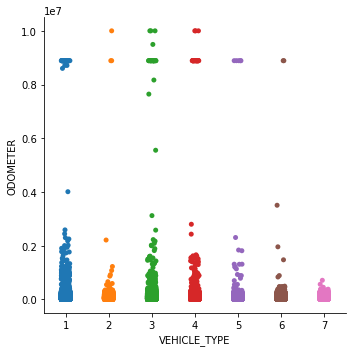

In [50]:
sns.catplot(x="VEHICLE_TYPE", y="ODOMETER", data=df_subset)

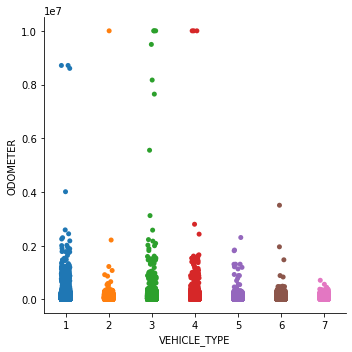

In [51]:
sns.catplot(x="VEHICLE_TYPE", y="ODOMETER", data=df_subset_trimmed)

#### Compare age and odometer distribution

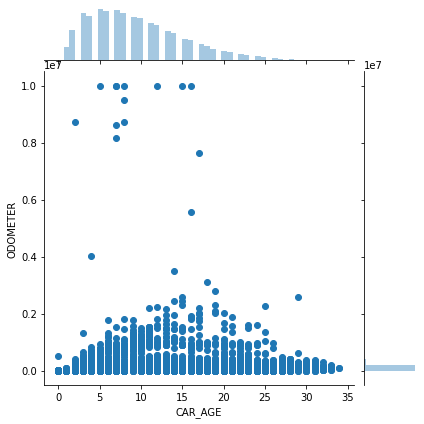

In [52]:
sns.jointplot(x="CAR_AGE", y="ODOMETER", data=df_subset_trimmed)

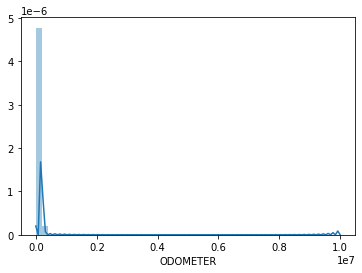

In [53]:
sns.distplot(df_subset_trimmed["ODOMETER"])

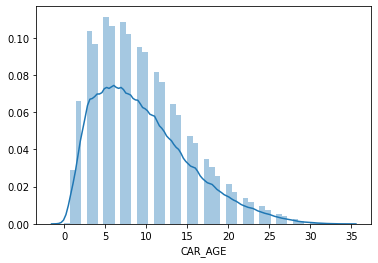

In [54]:
sns.distplot(df_subset_trimmed["CAR_AGE"])

#### Option 1. Delete rows with odometer values of 400000+ miles
`df_subset_trimmed_strict`

In [55]:
df_subset_trimmed_strict = df_subset_trimmed[df_subset_trimmed['ODOMETER']<400000]

#### Option 2. Impute rows with odometer value of 400000+ miles
`df_subset_trimmed_imputed`

In [56]:
# impute values wi

## Feature Engineering

1. Reducing categories in FUEL_TYPE

The majority of the cars is using gasoline ("G"). However, we still think FUEL TYPE might be an interesing feature, therefore we reduced FUEL TYPE to three categories: Gasoline = G, Diesel = D, and others = O and named it "FUEL_REDUCED". (HB) 
2. Dummy encoding for the categorical variables: fuel type, vehicle type, and GVW type.

In [57]:
# replacing FUEL_TYPE values
def replace_fuel(row):
  if row.FUEL_TYPE == "B" or row.FUEL_TYPE == "L" or row.FUEL_TYPE == "N" or row.FUEL_TYPE == "X" :
    return "O"
  else: return row.FUEL_TYPE

In [58]:
df_subset_trimmed['FUEL_REDUCED'] = df_subset_trimmed.apply(lambda x: replace_fuel(x), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


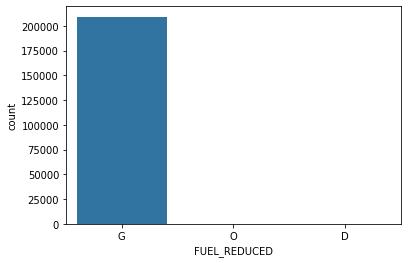

In [59]:
sns.countplot(df_subset_trimmed["FUEL_REDUCED"])

In [60]:
df_subset_trimmed["FUEL_REDUCED"].value_counts()

G    209286
D       333
O       295
Name: FUEL_REDUCED, dtype: int64

In [61]:
# one hot encoding
df_dummy = pd.get_dummies(df_subset_trimmed[["FUEL_REDUCED", "VEHICLE_TYPE", "GVW_TYPE"]], prefix=["FUEL_REDUCED","VEHICLE_TYPE","GVW_TYPE"])

In [62]:
df_encoded = pd.concat([df_subset_trimmed[["CAR_AGE","ODOMETER","OVERALL_RESULT"]],df_dummy], axis=1)

In [63]:
# encode the target variable, overall_result
df_encoded['OVERALL_RESULT']=df_encoded['OVERALL_RESULT'].replace({'P':1, 'F':0})

## Modeling


### Prepare Dataset
 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_features=df_encoded.drop(["OVERALL_RESULT"], axis=1)
df_target = df_encoded["OVERALL_RESULT"]

In [66]:
features_train, features_test, target_train, target_test = train_test_split(df_features, df_target, random_state=42)

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
# class_weight = 'balanced' will help correct for the highly imbalanced data (more passes than fails)
log_reg_model = LogisticRegression(class_weight='balanced')

In [69]:
log_reg_model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
prediction = log_reg_model.predict(features_test)

In [71]:
# for imbalanced classes use AUC rather than an accuracy score.
from sklearn.metrics import roc_auc_score, confusion_matrix

In [72]:
roc_auc_score(target_test, prediction)

0.5

###Scaling of the features
##### All Features With Scaling

In [73]:
# scale features
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df_subset_trimmed[["CAR_AGE","ODOMETER"]])

In [75]:
# concatenating scaled and encoded features
features_scaled_complete = np.concatenate([features_scaled, df_dummy.values], axis=1)

In [76]:
features_train, features_test, target_train, target_test = train_test_split(features_scaled_complete, df_target, random_state=42)

In [77]:
# fit model with scaled and encoded features
log_reg_model.fit(features_train, target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
prediction = log_reg_model.predict(features_test)

In [79]:
# scaling the features bumped the score up! 
roc_auc_score(target_test, prediction)

0.662926666370429

In [80]:
# let's look at all relevant metrics
from sklearn.metrics import classification_report
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.18      0.65      0.28      5076
           1       0.95      0.68      0.79     47403

    accuracy                           0.68     52479
   macro avg       0.56      0.66      0.54     52479
weighted avg       0.87      0.68      0.74     52479



Test with odometer as the only feature.

In [81]:
odometer = df_features['ODOMETER'].values
odometer = odometer.reshape(-1,1)

In [82]:
features_train, features_test, target_train, target_test = train_test_split(odometer, df_target, random_state=42)

In [83]:
log_reg_model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
prediction = log_reg_model.predict(features_test)

In [85]:
roc_auc_score(target_test, prediction)

0.5

In [86]:
# without the "balanced" input
log_reg_model = LogisticRegression()

In [87]:
log_reg_model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
prediction = log_reg_model.predict(features_test)

In [89]:
roc_auc_score(target_test, prediction)

0.5

Test with age as the only feature. 

In [90]:
age = df_features["CAR_AGE"].values.reshape(-1,1)

In [91]:
log_reg_model = LogisticRegression(class_weight='balanced')

In [92]:
features_train, features_test, target_train, target_test = train_test_split(age, df_target, random_state=42)

In [93]:
log_reg_model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
prediction = log_reg_model.predict(features_test)

In [95]:
roc_auc =roc_auc_score(target_test, prediction)

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test, prediction)

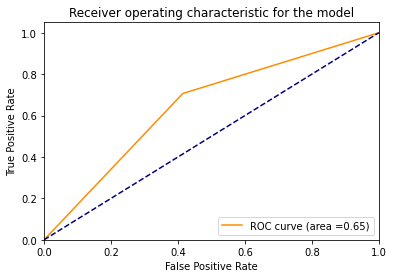

In [97]:
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area ={round(roc_auc,2)})')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for the model')
plt.legend(loc="lower right")
plt.show()

In [98]:
# checking f1 score
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.18      0.59      0.27      5076
           1       0.94      0.71      0.81     47403

    accuracy                           0.69     52479
   macro avg       0.56      0.65      0.54     52479
weighted avg       0.87      0.69      0.76     52479



#### Only age and odometer as features (scaled)


In [99]:
features_train, features_test, target_train, target_test = train_test_split(features_scaled, df_target, random_state=42)

In [100]:
log_reg_model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
prediction = log_reg_model.predict(features_test)

In [102]:
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.18      0.64      0.28      5076
           1       0.95      0.68      0.79     47403

    accuracy                           0.68     52479
   macro avg       0.56      0.66      0.54     52479
weighted avg       0.87      0.68      0.74     52479



In [103]:
# almost the same score as including all encoded featurse
roc_auc_score(target_test, prediction)

0.6631515750791127

Decision point: continue with logisitc regression and try and optimize, or try another model?

### SVM Classifier

#### Code for Downsampling (helps with SVC)

In [104]:
df_encoded.head()

,CAR_AGE,ODOMETER,OVERALL_RESULT,FUEL_REDUCED_D,FUEL_REDUCED_G,FUEL_REDUCED_O,VEHICLE_TYPE_1,VEHICLE_TYPE_2,VEHICLE_TYPE_3,VEHICLE_TYPE_4,VEHICLE_TYPE_5,VEHICLE_TYPE_6,VEHICLE_TYPE_7,GVW_TYPE_1.0,GVW_TYPE_2.0,GVW_TYPE_3.0
0,11,53274,1,0,1,0,0,0,1,0,0,0,0,1,0,0
1,5,109225,1,0,1,0,1,0,0,0,0,0,0,1,0,0
3,20,152121,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,8,135640,1,0,1,0,1,0,0,0,0,0,0,1,0,0
5,4,43428,1,0,1,0,1,0,0,0,0,0,0,1,0,0


In [105]:
# downsample large class
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_encoded.OVERALL_RESULT, test_size=.05, random_state=0)
X_train = pd.concat([X_train[X_train.OVERALL_RESULT == 1].sample(frac=.11, random_state=0), X_train[X_train.OVERALL_RESULT == 0]])
# shuffle
X_train = X_train.sample(frac=1, random_state=0)
y_train = X_train.OVERALL_RESULT
X_train = X_train.drop('OVERALL_RESULT', axis=1)
X_test = X_test.drop('OVERALL_RESULT', axis=1)

#### Training

In [106]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

In [107]:
svm_clf = SVC()

In [108]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
preds = svm_clf.predict(X_test)

In [110]:
roc_auc_score(y_test, preds)

0.6457995013886707

In [111]:
confusion_matrix(y_test, preds)

array([[ 657,  325],
       [3591, 5923]])

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [113]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']


   



In [ ]:
 for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

# Tuning hyper-parameters for precision



In [ ]:
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()